## DeepSat (SAT-6) Airborne Dataset Analysis 
+ Purpose is to characterize the DeepSat Data/images into categories accurately
+ First step will be to be able to feed the data into a simple CNN using Batch Normalization and check the performance
+ Simple CNN performance characterized 
    - with 50000 train-images and 4000 test-images
        + {'Accuracy': 0.877, 'Precision': 0.9708216, 'Recall': 0.9918933, 'loss': 0.3487776, 'global_step': 98}
    - with 100000 train-images and 10000 test-images and nearly 2000 Steps
        + {'Accuracy': 0.887, 'Precision': 0.99013156, 'Recall': 0.9774775, 'loss': 0.25368488, 'global_step': 196}

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
print(tf.__version__)

1.11.0


In [3]:
path_a = os.getcwd()+"\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    print(f)
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

print(trainfiles, testfiles)
# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=180000, header=None) 
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=180000, header=None)
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : c:\Public\DeepSat\deepsat-sat6
c:\Public\DeepSat\deepsat-sat6\sat6annotations.csv
c:\Public\DeepSat\deepsat-sat6\X_test_sat6.csv
c:\Public\DeepSat\deepsat-sat6\X_train_sat6.csv
c:\Public\DeepSat\deepsat-sat6\y_test_sat6.csv
c:\Public\DeepSat\deepsat-sat6\y_train_sat6.csv
['c:\\Public\\DeepSat\\deepsat-sat6\\X_train_sat6.csv', 'c:\\Public\\DeepSat\\deepsat-sat6\\y_train_sat6.csv'] ['c:\\Public\\DeepSat\\deepsat-sat6\\X_test_sat6.csv', 'c:\\Public\\DeepSat\\deepsat-sat6\\y_test_sat6.csv']


In [4]:
print(x_train.shape, y_train.shape)

(180000, 28, 28, 4) (180000, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

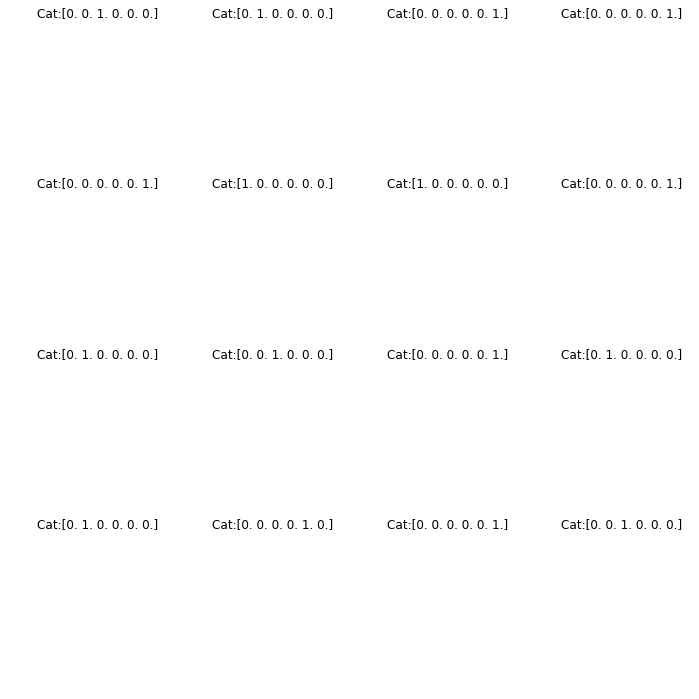

In [5]:
import matplotlib.pyplot as plt
c_train_x, c_train_y = x_train[0:16],y_train[0:16] 
fig, m_axs = plt.subplots(4, c_train_x.shape[0]//4, figsize = (12, 12))
for (x, y, c_ax) in zip(c_train_x, c_train_y, m_axs.flatten()):
    c_ax.imshow(x[:,:,:3],interpolation = 'none')
    c_ax.axis('off')
    c_ax.set_title('Cat:{}'.format(y))

In [7]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=70000, header=None) 
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=70000, header=None)
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

## Put the Tensorflow model in Place 
+ Simple CNN with no Batch Normalization
+ Simple CNN with Batch Normalization
+ Simple CNN with Group Normalization

In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(180000, 28, 28, 4) (180000, 6) (70000, 28, 28, 4) (70000, 6)


In [9]:
'''
Without any Batch Normalization
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here
def cnn_model_fn(features, labels, mode, params, config):
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.scalar('loss', loss)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [10]:
'''
With Batch Normalization + Fully connected
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

def batch_norm_wrapper(inputs, is_training, decay = 0.999):
    epsilon = 1e-3
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False)
    pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False)

    if is_training:
        batch_mean, batch_var = tf.nn.moments(inputs,[0])
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, epsilon)
    else:
        return tf.nn.batch_normalization(inputs,
            pop_mean, pop_var, beta, scale, epsilon)

# Our application logic will be added here
def cnn_model_bn_fn(features, labels, mode, params, config):
    
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    #dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Add Batch Normalization layer here
#     if mode==tf.estimator.ModeKeys.TRAIN:
#         batch_mean2, batch_var2 = tf.nn.moments(dropout,[0])
#         scale2 = tf.Variable(tf.ones([1024]))
#         beta2 = tf.Variable(tf.zeros([1024]))
#         dense2 = tf.nn.batch_normalization(dropout,batch_mean2,batch_var2,beta2,scale2,epsilon)
#     else:
#         dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    # Second Dense Layer
    dense2 = batch_norm_wrapper(dropout, is_training=mode == tf.estimator.ModeKeys.TRAIN)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.scalar('loss', loss)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


In [11]:
'''
Printing out the losses per step
- Number of steps kept at 1 
- Number of epochs kept at 3 each for train and test
- 20 iterations for 50% of the training data and 75% of the test data 
- With Batch Normalization used
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_bn_fn, model_dir="C:/Public/DeepSat/cnn_model/6",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(20):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=350, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Public/DeepSat/cnn_model/6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000002C34FDD8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
This is the 0 iteration
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines

INFO:tensorflow:loss = 0.3515097, probabilities = [[0.74660593 0.00990737 0.02164803 0.00752609 0.20881814 0.00549435]
 [0.00361046 0.00023499 0.00039061 0.00096986 0.04128432 0.95350975]
 [0.890524   0.0034768  0.01123844 0.00069048 0.08200511 0.01206519]
 ...
 [0.01157964 0.04454874 0.06680046 0.8747986  0.0021988  0.0000737 ]
 [0.1408636  0.00644227 0.00183516 0.00105919 0.10090943 0.7488904 ]
 [0.01569773 0.679166   0.07007242 0.22241043 0.01203926 0.00061412]] (8.844 sec)
INFO:tensorflow:loss = 0.33833364, probabilities = [[0.00041206 0.9928731  0.00108305 0.00192942 0.00328734 0.00041515]
 [0.01670874 0.77332294 0.02799879 0.16819021 0.01319727 0.0005822 ]
 [0.01100115 0.00077557 0.00118729 0.0001917  0.02149861 0.9653457 ]
 ...
 [0.04383434 0.769639   0.04613173 0.08938238 0.05044389 0.00056872]
 [0.00019037 0.00316524 0.97348964 0.02104987 0.00195909 0.00014573]
 [0.00925393 0.00084362 0.00200579 0.00024631 0.00336994 0.98428035]] (8.826 sec)
INFO:tensorflow:loss = 0.31422263, 

INFO:tensorflow:loss = 0.27756682, probabilities = [[0.00214653 0.00009308 0.00116934 0.00140266 0.01128701 0.9839013 ]
 [0.00951777 0.00008192 0.00014967 0.00028059 0.00121697 0.9887531 ]
 [0.02338783 0.00002795 0.00111047 0.00008424 0.00288273 0.97250676]
 ...
 [0.0000563  0.00001192 0.99878997 0.00095531 0.00018638 0.00000022]
 [0.00063126 0.00012103 0.00008545 0.00027389 0.02024105 0.97864735]
 [0.02543557 0.8830487  0.02454907 0.05691729 0.00941848 0.00063089]] (8.844 sec)
INFO:tensorflow:global_step/sec: 1.12374
INFO:tensorflow:loss = 0.25754696, probabilities = [[0.0020496  0.96212435 0.00087648 0.03259343 0.00226646 0.00008974]
 [0.00207686 0.0000014  0.00005677 0.00004026 0.00108929 0.9967354 ]
 [0.00007426 0.00063304 0.00125249 0.9977805  0.00025857 0.00000113]
 ...
 [0.02505766 0.8938883  0.00237932 0.06060505 0.01709442 0.00097534]
 [0.01804677 0.6125939  0.01928348 0.32352516 0.02337679 0.0031739 ]
 [0.24548472 0.00345313 0.00323405 0.00264032 0.7316252  0.01356263]] (8.83

INFO:tensorflow:loss = 0.20364895, probabilities = [[0.00021823 0.0002327  0.9973484  0.002152   0.00004729 0.00000131]
 [0.7760101  0.0279892  0.0127491  0.00594564 0.17567286 0.001633  ]
 [0.00179333 0.00017119 0.00013163 0.00009132 0.0543949  0.9434176 ]
 ...
 [0.0014212  0.00038819 0.87932616 0.11624437 0.00261881 0.00000123]
 [0.00270443 0.00006738 0.00035277 0.00011546 0.00180243 0.9949575 ]
 [0.00034662 0.00028898 0.96778023 0.0307687  0.00080971 0.00000579]] (8.900 sec)
INFO:tensorflow:loss = 0.24648595, probabilities = [[0.00059322 0.00004449 0.00008211 0.00000731 0.00164587 0.99762696]
 [0.00719343 0.31989256 0.00699253 0.6445182  0.02080989 0.00059335]
 [0.00205555 0.11035471 0.00111013 0.8836147  0.00272624 0.00013864]
 ...
 [0.00169331 0.00013511 0.00120685 0.00044874 0.00719716 0.9893188 ]
 [0.02980816 0.16940098 0.05508314 0.72695494 0.0184612  0.0002915 ]
 [0.00360859 0.97372437 0.00030268 0.02047954 0.00183919 0.00004553]] (8.879 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:loss = 0.19859892, probabilities = [[0.00164338 0.00001397 0.0005053  0.0002687  0.00234974 0.99521893]
 [0.00152927 0.00004696 0.00008013 0.00014633 0.00141982 0.9967775 ]
 [0.00057884 0.00000171 0.00000997 0.00000169 0.00020659 0.99920124]
 ...
 [0.00016689 0.00170821 0.00267785 0.9948211  0.00062561 0.0000003 ]
 [0.00363733 0.00002294 0.00007669 0.00001923 0.00466178 0.991582  ]
 [0.00318886 0.00004324 0.00060835 0.00034813 0.00059096 0.9952205 ]] (8.964 sec)
INFO:tensorflow:loss = 0.20928499, probabilities = [[0.01718382 0.00062695 0.00154356 0.00001122 0.00019534 0.9804391 ]
 [0.00294573 0.28187123 0.01698367 0.6941023  0.00378895 0.00030815]
 [0.00642471 0.00038613 0.00787247 0.00093535 0.0177704  0.9666109 ]
 ...
 [0.01248901 0.00118852 0.00038659 0.00028879 0.00178838 0.98385876]
 [0.00163888 0.95384383 0.00386842 0.03805088 0.00248025 0.00011765]
 [0.00446779 0.00005491 0.00008836 0.00014047 0.00241078 0.9928377 ]] (8.871 sec)
INFO:tensorflow:loss = 0.23263568,

INFO:tensorflow:loss = 0.22209391, probabilities = [[0.00504735 0.9051217  0.00181828 0.07682744 0.01012746 0.00105764]
 [0.00377841 0.00028043 0.00020875 0.00006901 0.04239888 0.95326453]
 [0.00268913 0.00002492 0.00016868 0.00005062 0.00333169 0.993735  ]
 ...
 [0.00050848 0.9774595  0.00011349 0.02077392 0.00113174 0.00001287]
 [0.00035611 0.00164331 0.9894572  0.00122661 0.00730455 0.00001227]
 [0.00101633 0.0000078  0.0002855  0.0000527  0.00357459 0.9950631 ]] (8.898 sec)
INFO:tensorflow:loss = 0.2031556, probabilities = [[0.00149851 0.82014835 0.01470007 0.16133246 0.00222898 0.0000916 ]
 [0.00025494 0.9990742  0.00003105 0.00047961 0.00012647 0.0000336 ]
 [0.00146571 0.00001386 0.0000299  0.00000992 0.00017218 0.9983084 ]
 ...
 [0.05222915 0.00021395 0.00022443 0.00007858 0.00899286 0.93826103]
 [0.00190564 0.0000726  0.00004447 0.00017067 0.00171631 0.99609023]
 [0.01360789 0.2946847  0.01104479 0.6737147  0.00436063 0.00258737]] (8.881 sec)
INFO:tensorflow:loss = 0.2201336, p

INFO:tensorflow:loss = 0.22171748, step = 901 (88.739 sec)
INFO:tensorflow:loss = 0.20431904, probabilities = [[0.01506125 0.00000287 0.00007527 0.00001061 0.00548283 0.9793672 ]
 [0.00014215 0.00025761 0.98989046 0.00875664 0.00094378 0.00000931]
 [0.00014815 0.00082085 0.9933543  0.00471632 0.00095467 0.00000568]
 ...
 [0.00088768 0.00020485 0.06090442 0.9368987  0.0011028  0.0000016 ]
 [0.00086373 0.0002662  0.9757759  0.02181135 0.00126517 0.00001766]
 [0.00116988 0.00007379 0.02181595 0.97679764 0.00014116 0.00000165]] (8.888 sec)
INFO:tensorflow:loss = 0.15027684, probabilities = [[0.00238412 0.00000411 0.00008954 0.00000529 0.00699733 0.99051964]
 [0.0159865  0.92846817 0.00518236 0.03974925 0.01058806 0.0000257 ]
 [0.00011205 0.00006865 0.00023823 0.9992305  0.00035017 0.0000004 ]
 ...
 [0.00411397 0.00012182 0.00004083 0.00001183 0.00175676 0.99395484]
 [0.0003271  0.0004303  0.1868251  0.81162703 0.00078535 0.00000512]
 [0.00055459 0.9391169  0.00023677 0.0410597  0.01896842 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/6\model.ckpt-1050
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1050 into C:/Public/DeepSat/cnn_model/6\model.ckpt.
INFO:tensorflow:loss = 0.17056195, probabilities = [[0.00008296 0.9977729  0.00004942 0.00183044 0.00023769 0.00002664]
 [0.00055552 0.00002251 0.00003056 0.00000204 0.00026891 0.9991204 ]
 [0.00000907 0.00036957 0.0000251  0.9995689  0.00002715 0.00000029]
 ...
 [0.00001522 0.00002459 0.00026692 0.9988543  0.00083776 0.00000123]
 [0.00263249 0.8149668  0.00147338 0.17690483 0.00391816 0.00010429]
 [0.00210367 0.9694392  0.00013824 0.02381581 0.0043106  0.00019253]]
INFO:tensorflow:loss = 0.17056195, step = 1051
INFO:tensorflow:loss = 0.14507654, probabilities = [[0.00106347 0.00060832 0.9886911  0.00564783 0.00387041 0.00011892]
 [0.00261603 0.00001371 0.00047098 0.00004669 0.00052969 0.9963

INFO:tensorflow:loss = 0.18843383, probabilities = [[0.00027904 0.00000256 0.00002256 0.0000026  0.00014426 0.999549  ]
 [0.00305383 0.33885062 0.00118858 0.6547866  0.0018844  0.00023599]
 [0.0004187  0.6704892  0.00106985 0.32624286 0.00171951 0.00005994]
 ...
 [0.00295966 0.00009609 0.00042473 0.00009616 0.00104398 0.9953793 ]
 [0.22645989 0.00145954 0.00003584 0.00036442 0.77166724 0.00001307]
 [0.00671756 0.83527803 0.03575161 0.10915296 0.01265106 0.00044864]] (8.876 sec)
INFO:tensorflow:loss = 0.1549119, probabilities = [[0.4835953  0.00071711 0.00190938 0.00041955 0.5129243  0.00043435]
 [0.00035471 0.9644435  0.00071845 0.03415127 0.0002971  0.0000351 ]
 [0.00121888 0.00009046 0.00006466 0.00001958 0.0046989  0.9939075 ]
 ...
 [0.00028983 0.0000413  0.00001908 0.0000031  0.00112591 0.9985208 ]
 [0.58337337 0.001188   0.00009747 0.00053612 0.40716472 0.00764032]
 [0.00193094 0.00136227 0.01158755 0.9850396  0.00007671 0.0000029 ]] (9.035 sec)
INFO:tensorflow:loss = 0.13263845, 

INFO:tensorflow:loss = 0.19641592, probabilities = [[0.00004762 0.00000386 0.99991095 0.00002228 0.00001516 0.0000001 ]
 [0.00064974 0.00000278 0.00004215 0.00000946 0.00002436 0.9992716 ]
 [0.00039961 0.00003595 0.99781007 0.00093486 0.00081213 0.00000737]
 ...
 [0.00022861 0.00009614 0.99891186 0.00043834 0.00031882 0.00000629]
 [0.00020272 0.9898651  0.00009638 0.00727437 0.00244772 0.00011358]
 [0.00356456 0.00003382 0.000021   0.00001118 0.00180069 0.9945688 ]] (8.853 sec)
INFO:tensorflow:Saving checkpoints for 1400 into C:/Public/DeepSat/cnn_model/6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.16896513.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-19:28:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/6\model.ckpt-1400
INFO:tenso

INFO:tensorflow:loss = 0.14723608, probabilities = [[0.00311643 0.00016128 0.00023642 0.00004281 0.00317446 0.99326855]
 [0.00507913 0.00000199 0.00004022 0.00001786 0.00080643 0.9940544 ]
 [0.00121138 0.00002843 0.0003351  0.00001269 0.000373   0.9980394 ]
 ...
 [0.00837151 0.0000243  0.000089   0.00002677 0.00040594 0.99108243]
 [0.0002983  0.9555814  0.00108043 0.04194371 0.00093251 0.00016362]
 [0.00043777 0.9491678  0.00311434 0.04591089 0.00135665 0.00001261]] (8.855 sec)
INFO:tensorflow:loss = 0.18010275, probabilities = [[0.00009184 0.00140236 0.00086819 0.99717736 0.00045767 0.00000267]
 [0.00227496 0.00001207 0.00016979 0.00005356 0.00081719 0.9966724 ]
 [0.00011383 0.0000006  0.00001068 0.00000078 0.00034142 0.9995327 ]
 ...
 [0.00034508 0.00092741 0.00020394 0.9984915  0.00001892 0.00001315]
 [0.00115073 0.00007154 0.00007001 0.00000865 0.00224947 0.9964496 ]
 [0.00059514 0.00005279 0.0000359  0.00000383 0.00572649 0.9935859 ]] (8.850 sec)
INFO:tensorflow:loss = 0.14994194,

INFO:tensorflow:global_step/sec: 1.12132
INFO:tensorflow:loss = 0.16625717, probabilities = [[0.00022262 0.00001204 0.00015898 0.00000758 0.00041191 0.9991868 ]
 [0.00025539 0.00002393 0.00003386 0.0000024  0.00037624 0.9993082 ]
 [0.00001873 0.999091   0.00001237 0.0007689  0.00010172 0.00000722]
 ...
 [0.0003866  0.01854191 0.37323916 0.5984064  0.00937984 0.00004611]
 [0.00015107 0.00001336 0.00010843 0.00000068 0.00023552 0.99949086]
 [0.00041276 0.00009933 0.00002036 0.00000789 0.00084421 0.9986154 ]] (8.960 sec)
INFO:tensorflow:loss = 0.16625717, step = 1701 (89.149 sec)
INFO:tensorflow:loss = 0.17576948, probabilities = [[0.00317998 0.00003915 0.00005749 0.00001052 0.02148619 0.97522664]
 [0.00105307 0.93643916 0.00018359 0.060757   0.00152464 0.00004256]
 [0.00094826 0.00293308 0.02677519 0.9661464  0.00319552 0.00000146]
 ...
 [0.00031272 0.00000117 0.00004165 0.00000074 0.0001617  0.9994821 ]
 [0.00193213 0.7184811  0.00150222 0.27782828 0.0002132  0.00004298]
 [0.00119158 0.

INFO:tensorflow:loss = 0.16081512, probabilities = [[0.0001052  0.00000606 0.99960524 0.0001726  0.00011078 0.00000012]
 [0.00047461 0.00029021 0.00020559 0.998787   0.00024223 0.00000044]
 [0.00087965 0.75540286 0.00081546 0.24123606 0.00165136 0.00001478]
 ...
 [0.0005391  0.00571654 0.00155611 0.99200433 0.00017387 0.00001002]
 [0.00036896 0.9950146  0.00009153 0.00385658 0.00066414 0.00000414]
 [0.00068563 0.343009   0.00076016 0.65510285 0.00034368 0.00009868]] (8.825 sec)
INFO:tensorflow:global_step/sec: 1.12961
INFO:tensorflow:loss = 0.13055146, probabilities = [[0.00004036 0.00150599 0.00083804 0.99738353 0.00023109 0.00000091]
 [0.00112517 0.9488362  0.00140141 0.04172116 0.00676995 0.00014608]
 [0.23606063 0.0001385  0.00003431 0.0000345  0.76373    0.00000209]
 ...
 [0.00251943 0.99541557 0.00003638 0.00189848 0.0001238  0.00000633]
 [0.00033218 0.18590352 0.00106873 0.81178916 0.00065905 0.00024732]
 [0.000058   0.0000008  0.00000239 0.00000145 0.00014245 0.9997949 ]] (8.82

INFO:tensorflow:loss = 0.11657247, probabilities = [[0.00070728 0.00001565 0.00052262 0.00005192 0.01246952 0.986233  ]
 [0.0000147  0.00042275 0.00005514 0.9994267  0.00008065 0.00000003]
 [0.00009366 0.00148721 0.00013035 0.9982236  0.00006508 0.00000007]
 ...
 [0.0003205  0.00000613 0.00001057 0.00000318 0.00813082 0.99152875]
 [0.00031249 0.00001412 0.00003729 0.00000569 0.00007838 0.9995521 ]
 [0.0062595  0.00015602 0.9877186  0.00562453 0.00022807 0.00001334]] (8.873 sec)
INFO:tensorflow:loss = 0.13737257, probabilities = [[0.00036446 0.00582844 0.00004865 0.9936412  0.00011018 0.00000712]
 [0.00025503 0.00000217 0.00012673 0.00000852 0.00052417 0.9990834 ]
 [0.00000562 0.00000342 0.00012463 0.9990846  0.0007818  0.00000001]
 ...
 [0.00001949 0.00000099 0.00001314 0.00000108 0.00012634 0.99983895]
 [0.00016789 0.00003188 0.00000218 0.00000448 0.00002864 0.999765  ]
 [0.00010459 0.00103585 0.9962031  0.00216714 0.00048463 0.00000458]] (8.858 sec)
INFO:tensorflow:loss = 0.17990069,

INFO:tensorflow:loss = 0.1581253, probabilities = [[0.00000213 0.00000115 0.00000204 0.00000067 0.00000366 0.99999034]
 [0.00292399 0.00000806 0.00138955 0.00012265 0.00137277 0.994183  ]
 [0.00019064 0.00000673 0.00001738 0.00000436 0.00006524 0.9997156 ]
 ...
 [0.00000982 0.00000104 0.99763525 0.00229162 0.00006223 0.00000009]
 [0.0004017  0.00001775 0.00114404 0.0000084  0.00177255 0.9966556 ]
 [0.00073213 0.9857982  0.00016136 0.01254201 0.000666   0.00010037]] (8.883 sec)
INFO:tensorflow:loss = 0.12230706, probabilities = [[0.00038358 0.00000256 0.00000499 0.00000305 0.00037602 0.9992298 ]
 [0.00405239 0.00000684 0.00001193 0.00000789 0.00052459 0.9953963 ]
 [0.0019045  0.9900109  0.00017477 0.00763369 0.00027045 0.00000562]
 ...
 [0.00002698 0.99924505 0.00000683 0.00066995 0.00005016 0.00000112]
 [0.00102806 0.0000186  0.00003319 0.00002303 0.00156627 0.9973309 ]
 [0.00019575 0.00000871 0.98193926 0.01748677 0.00036879 0.0000006 ]] (8.805 sec)
INFO:tensorflow:loss = 0.208377, pr

INFO:tensorflow:loss = 0.122367725, probabilities = [[0.00099839 0.00002948 0.00002668 0.00000623 0.00090543 0.9980338 ]
 [0.00275304 0.6217432  0.00760144 0.36593062 0.00183329 0.00013841]
 [0.0018389  0.00017527 0.00376546 0.00003549 0.01047288 0.983712  ]
 ...
 [0.00018499 0.9982132  0.0000748  0.00127617 0.00024695 0.00000394]
 [0.00584898 0.00002466 0.00106703 0.00001213 0.00577871 0.9872685 ]
 [0.41914707 0.00742925 0.00107234 0.02909355 0.5431001  0.00015765]] (8.821 sec)
INFO:tensorflow:loss = 0.13156754, probabilities = [[0.00047918 0.00011042 0.99887663 0.00034885 0.00013533 0.00004965]
 [0.00238973 0.00000286 0.00000177 0.00000159 0.00008269 0.99752134]
 [0.7822652  0.02641145 0.00278189 0.14217274 0.04470436 0.00166436]
 ...
 [0.03034661 0.2802888  0.01296549 0.667332   0.00685712 0.00220997]
 [0.00019169 0.00004175 0.9982736  0.00086012 0.00063081 0.00000194]
 [0.00039549 0.00000164 0.00001594 0.0000039  0.00396651 0.99561656]] (8.858 sec)
INFO:tensorflow:loss = 0.14871323

INFO:tensorflow:loss = 0.14827368, step = 2451
INFO:tensorflow:loss = 0.18211903, probabilities = [[0.9649011  0.0053167  0.00037415 0.00093154 0.02802819 0.00044823]
 [0.00011058 0.00000043 0.00000352 0.00000036 0.00004258 0.9998425 ]
 [0.00285409 0.00264029 0.6990102  0.29452044 0.00082066 0.0001544 ]
 ...
 [0.00028233 0.00002522 0.9975569  0.00209353 0.00004171 0.0000002 ]
 [0.0001141  0.00018053 0.9985819  0.00081956 0.00029731 0.0000066 ]
 [0.0000484  0.00000474 0.00000531 0.00000063 0.00021324 0.99972767]] (9.080 sec)
INFO:tensorflow:loss = 0.11362308, probabilities = [[0.00128144 0.00000753 0.0001378  0.00000522 0.00033161 0.9982364 ]
 [0.00101901 0.26457268 0.00289167 0.73111284 0.00039759 0.00000619]
 [0.00031477 0.00000549 0.0000101  0.00000148 0.00023176 0.99943644]
 ...
 [0.00021452 0.00001617 0.00001375 0.00000073 0.00151481 0.99824   ]
 [0.00020156 0.00000023 0.0000009  0.00000111 0.00002071 0.99977547]
 [0.00135421 0.00003102 0.00008394 0.00001432 0.00007462 0.9984419 ]]

INFO:tensorflow:loss = 0.15028822, probabilities = [[0.00415582 0.00000545 0.00004851 0.00001801 0.00235713 0.9934151 ]
 [0.0000325  0.9761554  0.00003267 0.02268132 0.0010895  0.00000866]
 [0.00007706 0.00001636 0.9994628  0.00024197 0.00020174 0.00000013]
 ...
 [0.00022507 0.00000193 0.00001956 0.00000904 0.0004204  0.99932396]
 [0.8994577  0.00042324 0.00628572 0.0276384  0.06164351 0.00455139]
 [0.80320555 0.00061333 0.00008508 0.00031186 0.19559364 0.00019041]] (8.856 sec)
INFO:tensorflow:loss = 0.12686595, probabilities = [[0.00899517 0.00000686 0.00008178 0.00000298 0.00014102 0.9907721 ]
 [0.0000797  0.00001156 0.00000625 0.00000044 0.00005556 0.99984646]
 [0.00056696 0.00000591 0.00011462 0.00000656 0.00078947 0.9985165 ]
 ...
 [0.00254388 0.00013173 0.99634403 0.00069947 0.00027865 0.00000221]
 [0.00008484 0.00053094 0.99732995 0.00064182 0.00140515 0.00000738]
 [0.00063489 0.9782744  0.00065536 0.01653624 0.00388695 0.00001212]] (8.907 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Saving checkpoints for 2800 into C:/Public/DeepSat/cnn_model/6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.09564856.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-19:57:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/6\model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-19:59:48
INFO:tensorflow:Saving dict for global step 2800: Accuracy = 0.95507145, Precision = 0.9984436, Recall = 0.98908746, global_step = 2800, loss = 0.11550623
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2800: C:/Public/DeepSat/cnn_model/6\model.ckpt-2800
Results for 7 iteration {'Accuracy': 0.95507145, 'Precision': 0.9984436, 'Recal

INFO:tensorflow:loss = 0.13665271, probabilities = [[0.0001226  0.00004313 0.0000319  0.00000534 0.00010452 0.99969256]
 [0.00033994 0.00000562 0.0000257  0.00000051 0.00007887 0.9995493 ]
 [0.00027732 0.13718988 0.01326309 0.8458306  0.00343413 0.00000506]
 ...
 [0.00028074 0.00000117 0.00000324 0.00000313 0.00022342 0.99948823]
 [0.73714364 0.00193125 0.00002467 0.00189331 0.25854677 0.00046038]
 [0.00002953 0.00129423 0.00001944 0.9986274  0.00002927 0.00000007]] (8.851 sec)
INFO:tensorflow:loss = 0.09364921, probabilities = [[0.00022566 0.00000614 0.99959964 0.00009463 0.00007302 0.00000099]
 [0.00234392 0.00002771 0.00009415 0.00002158 0.00725102 0.9902616 ]
 [0.00024396 0.99599326 0.00009974 0.00226896 0.0013776  0.00001637]
 ...
 [0.00189859 0.00052226 0.9684372  0.02894314 0.00019375 0.00000503]
 [0.00490475 0.00000817 0.00254145 0.00002362 0.00022503 0.992297  ]
 [0.00489387 0.00008711 0.00001156 0.00001241 0.00040491 0.99459016]] (8.859 sec)
INFO:tensorflow:loss = 0.12663299,

INFO:tensorflow:loss = 0.11811383, step = 3101 (89.253 sec)
INFO:tensorflow:loss = 0.12924516, probabilities = [[0.00013483 0.9986817  0.00002655 0.00064237 0.00051191 0.00000255]
 [0.00001147 0.00000307 0.99934    0.00063594 0.00000929 0.00000019]
 [0.00035982 0.01027853 0.00188284 0.98742163 0.00004508 0.00001217]
 ...
 [0.00077416 0.98021895 0.00020204 0.01831641 0.00047981 0.00000863]
 [0.00007746 0.9954945  0.0000588  0.00344118 0.00092666 0.00000142]
 [0.00214959 0.4832203  0.00468217 0.5096688  0.00025185 0.00002731]] (8.952 sec)
INFO:tensorflow:loss = 0.11448951, probabilities = [[0.00005909 0.00102976 0.00013312 0.99860483 0.00017289 0.00000038]
 [0.02282799 0.00042675 0.0002417  0.00007848 0.08393608 0.892489  ]
 [0.03675937 0.05156414 0.3967812  0.50366825 0.01058533 0.00064176]
 ...
 [0.00020062 0.9954176  0.00010743 0.00395024 0.00029479 0.00002925]
 [0.00221236 0.00032124 0.99695    0.00027776 0.00023683 0.0000019 ]
 [0.00167801 0.00000584 0.00007071 0.00016407 0.0000922 

INFO:tensorflow:global_step/sec: 1.12304
INFO:tensorflow:loss = 0.11852518, probabilities = [[0.0014093  0.00079107 0.08424906 0.91325295 0.0002963  0.00000126]
 [0.00018566 0.00004356 0.00007541 0.00001135 0.00332239 0.9963617 ]
 [0.00020251 0.9980919  0.00001422 0.00101763 0.00067298 0.00000081]
 ...
 [0.00530513 0.00382028 0.01041068 0.9786861  0.00177061 0.00000722]
 [0.00006377 0.00000795 0.9998085  0.0001021  0.00001696 0.00000077]
 [0.00001354 0.00000036 0.00000236 0.00000022 0.00000736 0.99997616]] (8.894 sec)
INFO:tensorflow:loss = 0.11852518, step = 3251 (89.042 sec)
INFO:tensorflow:loss = 0.10251352, probabilities = [[0.00002748 0.00000435 0.99511635 0.00480611 0.00004567 0.00000015]
 [0.00064831 0.9728088  0.0000557  0.02611597 0.00034945 0.00002197]
 [0.00004061 0.00004997 0.9992416  0.00016994 0.0004959  0.00000208]
 ...
 [0.0001701  0.0000001  0.00001895 0.00000002 0.00004572 0.9997651 ]
 [0.00040653 0.001834   0.00296525 0.9940416  0.00074242 0.0000102 ]
 [0.00036345 0.

INFO:tensorflow:loss = 0.1249841, probabilities = [[0.0000658  0.00000631 0.0000169  0.00000321 0.00024047 0.9996673 ]
 [0.00057537 0.00000066 0.00005965 0.00000071 0.00004188 0.9993217 ]
 [0.0005028  0.00000843 0.00003935 0.0000196  0.00010593 0.99932396]
 ...
 [0.00037687 0.9286778  0.00071207 0.06781291 0.00241358 0.00000676]
 [0.00010883 0.00099737 0.00127582 0.997581   0.00003685 0.00000016]
 [0.00578134 0.00030681 0.0000588  0.00002479 0.00200018 0.9918281 ]] (8.880 sec)
INFO:tensorflow:loss = 0.13839406, probabilities = [[0.00014826 0.00000259 0.00001189 0.00000154 0.00002327 0.9998124 ]
 [0.00025771 0.00000965 0.00004378 0.00000162 0.00004396 0.9996433 ]
 [0.00003586 0.9965385  0.00001149 0.00132918 0.00208302 0.00000185]
 ...
 [0.00014193 0.00000008 0.00000574 0.0000002  0.00007384 0.9997782 ]
 [0.00104513 0.00000093 0.0000402  0.0000024  0.00017406 0.9987373 ]
 [0.00103621 0.9149795  0.00150054 0.08181804 0.00065656 0.00000912]] (8.861 sec)
INFO:tensorflow:loss = 0.14402884, 

INFO:tensorflow:loss = 0.12432486, probabilities = [[0.00032243 0.01526374 0.94991606 0.03384782 0.00064587 0.00000402]
 [0.0000655  0.99939144 0.000004   0.00018908 0.00033758 0.00001221]
 [0.0000227  0.00002002 0.9998628  0.00006809 0.00002602 0.00000045]
 ...
 [0.07336509 0.00028536 0.00519735 0.00007212 0.91194427 0.00913572]
 [0.00012455 0.9881368  0.00007259 0.01159068 0.00006593 0.00000939]
 [0.00055089 0.99344385 0.00009803 0.00490231 0.00100231 0.00000261]] (8.923 sec)
INFO:tensorflow:loss = 0.13252333, probabilities = [[0.00011125 0.01389594 0.00044104 0.98488206 0.00066563 0.00000408]
 [0.00015631 0.96197903 0.00114824 0.03510758 0.00154659 0.00006217]
 [0.00125593 0.0002291  0.9926448  0.00407042 0.00179845 0.00000131]
 ...
 [0.00014254 0.00000152 0.00000637 0.00000062 0.00000868 0.99984026]
 [0.00024214 0.00300737 0.9623325  0.0296175  0.00474598 0.00005457]
 [0.789695   0.00002851 0.0002501  0.00077699 0.20914002 0.00010926]] (9.021 sec)
INFO:tensorflow:loss = 0.08205312,

INFO:tensorflow:loss = 0.15365869, probabilities = [[0.00104524 0.00031746 0.82782155 0.17069523 0.00009403 0.00002647]
 [0.00005283 0.9992459  0.00001034 0.000582   0.00010828 0.00000065]
 [0.00041571 0.9327041  0.00000446 0.0668578  0.00001629 0.00000165]
 ...
 [0.00050005 0.00000326 0.00002408 0.00001642 0.00064104 0.9988152 ]
 [0.00002503 0.99973506 0.00000104 0.00016226 0.00007618 0.00000034]
 [0.00028737 0.01914697 0.00048208 0.9792378  0.00084363 0.00000226]] (8.927 sec)
INFO:tensorflow:loss = 0.13360742, probabilities = [[0.00000474 0.00000127 0.9998253  0.00016531 0.00000343 0.00000005]
 [0.00040549 0.00015535 0.9484484  0.0506521  0.00033371 0.00000498]
 [0.00247807 0.7066952  0.00077531 0.28801742 0.00189355 0.00014045]
 ...
 [0.7785199  0.00038403 0.00067753 0.00255446 0.21352082 0.00434337]
 [0.00023673 0.00000624 0.00006368 0.00000912 0.00152939 0.9981548 ]
 [0.00001246 0.00000076 0.00000077 0.00000018 0.0000436  0.9999422 ]] (8.940 sec)
INFO:tensorflow:loss = 0.112343304

INFO:tensorflow:loss = 0.12178466, probabilities = [[0.8805482  0.00115717 0.00568123 0.01136065 0.10114297 0.00010984]
 [0.00008829 0.7947364  0.00015297 0.204961   0.00004521 0.00001615]
 [0.00020725 0.90480655 0.0015918  0.09277778 0.00058669 0.00003   ]
 ...
 [0.00028603 0.99162793 0.00003443 0.00747389 0.0005755  0.0000023 ]
 [0.00016075 0.9972037  0.00010358 0.00226871 0.00025813 0.00000521]
 [0.0003203  0.5131545  0.00045254 0.48482203 0.00124548 0.0000051 ]] (8.894 sec)
INFO:tensorflow:loss = 0.17087036, probabilities = [[0.00085006 0.00000246 0.00001657 0.00000048 0.00058779 0.99854267]
 [0.00007714 0.9993405  0.00000224 0.00023749 0.00034197 0.00000043]
 [0.00093154 0.00052761 0.00233585 0.9961778  0.00002678 0.00000037]
 ...
 [0.00010741 0.00347981 0.0000742  0.9961971  0.00014047 0.00000111]
 [0.00012252 0.00025833 0.00786132 0.9917355  0.00002009 0.00000216]
 [0.00002739 0.00000058 0.00002239 0.00000013 0.00009069 0.99985886]] (8.890 sec)
INFO:tensorflow:loss = 0.15021497,

INFO:tensorflow:loss = 0.10560022, probabilities = [[0.00116303 0.7560603  0.0023838  0.2179274  0.02214491 0.00032049]
 [0.00074872 0.00072432 0.97084564 0.02526825 0.00240278 0.00001028]
 [0.00005955 0.00000936 0.00000433 0.00000018 0.00022577 0.9997008 ]
 ...
 [0.00079995 0.00000121 0.00004062 0.00000161 0.00001866 0.9991379 ]
 [0.00046393 0.00003357 0.9987935  0.00065087 0.00005445 0.00000375]
 [0.00218085 0.00011407 0.9933109  0.0013197  0.00304828 0.00002614]] (8.862 sec)
INFO:tensorflow:global_step/sec: 1.12501
INFO:tensorflow:loss = 0.13013002, probabilities = [[0.00006828 0.9989692  0.0000048  0.00078574 0.00017024 0.00000175]
 [0.1332152  0.44253683 0.07800746 0.23453364 0.10371658 0.00799018]
 [0.00052621 0.00000034 0.00001174 0.00000147 0.00000843 0.9994518 ]
 ...
 [0.00147219 0.98835725 0.00012205 0.00843057 0.00161378 0.0000041 ]
 [0.00009635 0.993168   0.000052   0.00628641 0.00037413 0.0000231 ]
 [0.7627797  0.06521717 0.00696703 0.14532174 0.01946378 0.00025057]] (8.93

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-20:26:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/6\model.ckpt-4200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-20:28:52
INFO:tensorflow:Saving dict for global step 4200: Accuracy = 0.9642571, Precision = 0.99800044, Recall = 0.993668, global_step = 4200, loss = 0.09584566
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4200: C:/Public/DeepSat/cnn_model/6\model.ckpt-4200
Results for 11 iteration {'Accuracy': 0.9642571, 'Precision': 0.99800044, 'Recall': 0.993668, 'loss': 0.09584566, 'global_step': 4200}
This is the 12 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create

INFO:tensorflow:loss = 0.094396144, probabilities = [[0.00003958 0.0000001  0.00000607 0.00000019 0.00000823 0.9999459 ]
 [0.00007776 0.00000387 0.00003219 0.00000671 0.00038131 0.9994981 ]
 [0.01570977 0.00002778 0.03849162 0.00000966 0.00121014 0.94455105]
 ...
 [0.00010771 0.00013731 0.99944264 0.0002887  0.00002349 0.00000022]
 [0.0001797  0.3889319  0.0010703  0.6095682  0.00023974 0.00001016]
 [0.00178838 0.00800832 0.7279172  0.2586494  0.00350337 0.00013341]] (8.976 sec)
INFO:tensorflow:loss = 0.11896421, probabilities = [[0.8907412  0.00001635 0.00069166 0.00007641 0.10814074 0.00033356]
 [0.00154677 0.21379276 0.0014486  0.78137934 0.00180167 0.00003083]
 [0.83179456 0.00025539 0.00016576 0.00004508 0.1671029  0.00063623]
 ...
 [0.00006894 0.00001758 0.00000275 0.0000008  0.00041017 0.9994998 ]
 [0.00013483 0.9960368  0.00007389 0.00351327 0.00024079 0.00000033]
 [0.02010437 0.48251572 0.01505566 0.36051035 0.12160589 0.000208  ]] (8.862 sec)
INFO:tensorflow:loss = 0.10499564

INFO:tensorflow:loss = 0.12642367, step = 4501 (88.786 sec)
INFO:tensorflow:loss = 0.13310885, probabilities = [[0.00002259 0.00000406 0.9998604  0.00003504 0.00007704 0.00000084]
 [0.00376187 0.940102   0.00122729 0.05091511 0.00396855 0.00002518]
 [0.00005613 0.00000015 0.00003977 0.00000019 0.0000228  0.9998809 ]
 ...
 [0.00009205 0.00000059 0.00007392 0.00000124 0.00005041 0.9997818 ]
 [0.8488055  0.0020125  0.00037424 0.00169042 0.1470091  0.00010829]
 [0.5729037  0.02256032 0.00402052 0.01178755 0.38852733 0.00020055]] (8.787 sec)
INFO:tensorflow:loss = 0.12269652, probabilities = [[0.00031347 0.9654305  0.00060075 0.03302318 0.00062733 0.00000471]
 [0.00009243 0.00057512 0.9946085  0.00465157 0.00007222 0.00000013]
 [0.00038986 0.00000144 0.9995685  0.00001236 0.00002742 0.00000032]
 ...
 [0.0000191  0.02312394 0.0001659  0.9766045  0.00008639 0.00000012]
 [0.9616832  0.00050602 0.00735247 0.00337303 0.02697776 0.00010748]
 [0.00004977 0.11044756 0.00020587 0.8867995  0.00248335

INFO:tensorflow:global_step/sec: 1.1102
INFO:tensorflow:loss = 0.12175775, probabilities = [[0.00001874 0.00003476 0.9953436  0.00458612 0.00001667 0.00000008]
 [0.00012657 0.00001206 0.00005564 0.00000181 0.00010961 0.99969435]
 [0.00000898 0.00000096 0.00000164 0.00000268 0.00001388 0.99997187]
 ...
 [0.00008815 0.00000454 0.00001073 0.00000583 0.0006754  0.99921536]
 [0.003393   0.00479474 0.9418602  0.04712142 0.00282614 0.00000455]
 [0.0000306  0.00006383 0.00000124 0.9996991  0.00020527 0.        ]] (8.845 sec)
INFO:tensorflow:loss = 0.12175775, step = 4651 (90.061 sec)
INFO:tensorflow:loss = 0.11640216, probabilities = [[0.0000655  0.00000009 0.00000087 0.00000016 0.00007478 0.9998586 ]
 [0.00008166 0.00000106 0.00000492 0.0000022  0.00009863 0.9998116 ]
 [0.0000232  0.00000039 0.00000457 0.00000012 0.0000355  0.9999362 ]
 ...
 [0.9064063  0.0003005  0.00226367 0.00026181 0.07681832 0.01394937]
 [0.00003836 0.00000003 0.00000613 0.0000001  0.00004069 0.99991465]
 [0.00011798 0.0

INFO:tensorflow:loss = 0.13130555, probabilities = [[0.00000245 0.00000035 0.0000001  0.00000025 0.00000812 0.9999888 ]
 [0.00479976 0.00000143 0.00008822 0.00001558 0.00440862 0.99068636]
 [0.00129425 0.00004185 0.99776983 0.00048671 0.00040511 0.00000228]
 ...
 [0.00007957 0.00000911 0.00002975 0.00000021 0.00019473 0.9996866 ]
 [0.0003238  0.00000274 0.00000517 0.00000192 0.00048381 0.9991825 ]
 [0.00004589 0.00267326 0.00016299 0.99662197 0.00049575 0.00000014]] (8.888 sec)
INFO:tensorflow:loss = 0.09255932, probabilities = [[0.00013562 0.00002683 0.99961424 0.0001626  0.00005843 0.00000243]
 [0.0002867  0.97745323 0.0000465  0.02097353 0.00123972 0.00000035]
 [0.00445804 0.00001962 0.00002642 0.00001311 0.00105719 0.99442565]
 ...
 [0.00082253 0.00012617 0.9988876  0.00004706 0.00011627 0.00000045]
 [0.00367023 0.00141804 0.07381634 0.91915697 0.0019043  0.0000342 ]
 [0.00007895 0.00006416 0.9988984  0.0008398  0.00011837 0.00000023]] (8.862 sec)
INFO:tensorflow:loss = 0.117179886

INFO:tensorflow:loss = 0.10869889, probabilities = [[0.00015368 0.00000115 0.00001468 0.00000275 0.00086837 0.9989594 ]
 [0.00019585 0.99823797 0.00002125 0.00088353 0.00065995 0.00000131]
 [0.00010527 0.00222483 0.00403286 0.99248886 0.00114597 0.00000229]
 ...
 [0.9249304  0.00034235 0.00024559 0.0002667  0.07381918 0.00039581]
 [0.00118874 0.00004773 0.99626416 0.00232596 0.00015754 0.00001591]
 [0.93069965 0.00033385 0.0098795  0.00222971 0.05671411 0.00014323]] (8.820 sec)
INFO:tensorflow:loss = 0.100531496, probabilities = [[0.0010923  0.00003471 0.00009034 0.00003207 0.00220662 0.99654394]
 [0.00009119 0.93275446 0.00255464 0.05033888 0.0141345  0.00012628]
 [0.00023366 0.00000173 0.00030417 0.00000314 0.00047547 0.9989818 ]
 ...
 [0.00003411 0.99894994 0.00000422 0.00068018 0.00032902 0.00000259]
 [0.00045122 0.00001572 0.9990062  0.00029209 0.00023319 0.00000158]
 [0.00003577 0.00000269 0.9999317  0.00002572 0.00000392 0.00000008]] (8.807 sec)
INFO:tensorflow:loss = 0.0963188,

INFO:tensorflow:loss = 0.07129354, probabilities = [[0.00001332 0.00016911 0.00001102 0.9997987  0.00000789 0.00000003]
 [0.00050831 0.00000019 0.00000402 0.00000035 0.00018181 0.99930537]
 [0.00102783 0.00000249 0.00001341 0.00000024 0.00051628 0.9984397 ]
 ...
 [0.00015154 0.00000089 0.00001607 0.00000152 0.00015108 0.99967897]
 [0.00090329 0.00000399 0.00007083 0.00001271 0.00257689 0.9964323 ]
 [0.00231438 0.00000062 0.00002214 0.00000149 0.00009998 0.99756134]] (8.799 sec)
INFO:tensorflow:loss = 0.089452595, probabilities = [[0.00030541 0.9971609  0.00004698 0.00194534 0.00053869 0.00000272]
 [0.00016612 0.00000024 0.00001666 0.00000042 0.00013566 0.9996809 ]
 [0.00122261 0.00001456 0.00015953 0.0000211  0.00449575 0.9940865 ]
 ...
 [0.00060246 0.00184004 0.02542845 0.9719097  0.00021899 0.0000004 ]
 [0.00019042 0.00260751 0.00011365 0.9970252  0.00006295 0.00000027]
 [0.0007633  0.96422356 0.00034152 0.03065649 0.00398985 0.00002525]] (8.862 sec)
INFO:tensorflow:loss = 0.11496524

INFO:tensorflow:loss = 0.09300725, probabilities = [[0.00060043 0.00000082 0.0000841  0.00000956 0.00073497 0.9985701 ]
 [0.0002681  0.9968893  0.00006617 0.0022234  0.00054969 0.00000345]
 [0.00000487 0.00000002 0.         0.9999951  0.         0.        ]
 ...
 [0.00085923 0.003708   0.00013255 0.99490935 0.00039036 0.00000056]
 [0.00065178 0.397104   0.00024889 0.5999632  0.00200802 0.00002413]
 [0.00001881 0.00000033 0.0000033  0.00000057 0.00004431 0.99993265]] (8.862 sec)
INFO:tensorflow:loss = 0.11479439, probabilities = [[0.00002785 0.00000397 0.9996737  0.00027616 0.00001836 0.00000002]
 [0.00015419 0.00000618 0.00002908 0.00000043 0.00384623 0.9959638 ]
 [0.00006959 0.00330937 0.03783831 0.95793027 0.00084913 0.0000033 ]
 ...
 [0.00027218 0.00004498 0.00003285 0.00003713 0.001151   0.99846184]
 [0.00002179 0.00026214 0.00184592 0.99774206 0.000128   0.00000011]
 [0.0004119  0.8700103  0.00070062 0.12804365 0.00083117 0.00000241]] (8.787 sec)
INFO:tensorflow:loss = 0.12714332,

INFO:tensorflow:loss = 0.107759774, probabilities = [[0.00152705 0.00001664 0.00001314 0.00000603 0.00397419 0.9944629 ]
 [0.00044545 0.00260353 0.00063498 0.9961081  0.0002046  0.00000328]
 [0.00046351 0.970177   0.00425826 0.02290762 0.00218571 0.00000792]
 ...
 [0.00001357 0.9998901  0.00000118 0.00007766 0.00001701 0.00000032]
 [0.0000228  0.00000068 0.00000793 0.00000138 0.00020229 0.999765  ]
 [0.00009605 0.01764751 0.00001076 0.98213035 0.00011459 0.00000065]] (9.165 sec)
INFO:tensorflow:global_step/sec: 1.12127
INFO:tensorflow:loss = 0.0911852, probabilities = [[0.00006137 0.00000159 0.00001028 0.00000019 0.00001695 0.99990964]
 [0.00017119 0.00000484 0.00000624 0.00000227 0.00004273 0.9997727 ]
 [0.00041779 0.0000082  0.00000306 0.00000413 0.0016073  0.9979595 ]
 ...
 [0.0003541  0.00048185 0.02807454 0.97086424 0.00022375 0.00000153]
 [0.00039975 0.00000727 0.00001061 0.00000021 0.00008997 0.99949217]
 [0.00003446 0.00000156 0.00006516 0.00000009 0.00010505 0.9997937 ]] (8.96

INFO:tensorflow:Starting evaluation at 2018-10-07-20:55:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/6\model.ckpt-5600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-20:57:55
INFO:tensorflow:Saving dict for global step 5600: Accuracy = 0.9589143, Precision = 0.9965714, Recall = 0.99637747, global_step = 5600, loss = 0.104137495
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5600: C:/Public/DeepSat/cnn_model/6\model.ckpt-5600
Results for 15 iteration {'Accuracy': 0.9589143, 'Precision': 0.9965714, 'Recall': 0.99637747, 'loss': 0.104137495, 'global_step': 5600}
This is the 16 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorfl

INFO:tensorflow:loss = 0.09716364, probabilities = [[0.0000124  0.00000503 0.99929917 0.00067536 0.00000795 0.0000001 ]
 [0.00130732 0.00006087 0.9983558  0.00012625 0.00014845 0.00000136]
 [0.00257699 0.00006781 0.0002625  0.00001361 0.00063433 0.99644476]
 ...
 [0.00005403 0.02628965 0.00043777 0.97300154 0.00021631 0.00000067]
 [0.01442716 0.00027365 0.00006697 0.00010339 0.9828089  0.00231987]
 [0.00025097 0.00000181 0.00001386 0.00000053 0.00019127 0.9995415 ]] (8.956 sec)
INFO:tensorflow:loss = 0.06574598, probabilities = [[0.00014414 0.9031393  0.00006662 0.09626666 0.00038144 0.00000184]
 [0.00003676 0.00009413 0.00003239 0.99982905 0.00000757 0.00000001]
 [0.97430974 0.00038526 0.00062572 0.00063136 0.0195128  0.00453521]
 ...
 [0.0000043  0.00000139 0.99998415 0.00000872 0.00000142 0.        ]
 [0.00016722 0.0003061  0.01180293 0.9876408  0.00008196 0.0000011 ]
 [0.00002777 0.00000163 0.00002799 0.00000031 0.00024402 0.9996983 ]] (9.041 sec)
INFO:tensorflow:loss = 0.11308685,

INFO:tensorflow:loss = 0.109392345, probabilities = [[0.00036174 0.00000934 0.00018289 0.0000016  0.00018422 0.99926025]
 [0.00005306 0.0000015  0.00000242 0.00000134 0.00007367 0.99986804]
 [0.00067359 0.83002824 0.00078719 0.16763401 0.00086797 0.00000896]
 ...
 [0.00003066 0.00001027 0.99983895 0.00011238 0.00000768 0.0000001 ]
 [0.25558433 0.00933182 0.00150266 0.00170545 0.73166597 0.00020974]
 [0.00021629 0.99747497 0.00010686 0.00150196 0.00069839 0.00000157]] (8.847 sec)
INFO:tensorflow:loss = 0.1010544, probabilities = [[0.8760074  0.00012605 0.00028563 0.00044032 0.12250561 0.00063517]
 [0.48430526 0.00018673 0.00000503 0.00002835 0.5144377  0.00103689]
 [0.00017413 0.99721503 0.00006596 0.00163574 0.00089626 0.00001283]
 ...
 [0.0000983  0.00000028 0.00000146 0.00000021 0.00000742 0.99989235]
 [0.00002686 0.9998498  0.00000267 0.00003474 0.00008599 0.00000008]
 [0.00008607 0.00668244 0.00028614 0.99273807 0.0002069  0.00000033]] (8.818 sec)
INFO:tensorflow:loss = 0.089121655

INFO:tensorflow:loss = 0.10048976, step = 6051 (89.041 sec)
INFO:tensorflow:loss = 0.0826738, probabilities = [[0.00019512 0.00000185 0.00010158 0.0000017  0.00278992 0.9969098 ]
 [0.00067851 0.00119678 0.00309284 0.99432665 0.00070452 0.00000072]
 [0.00000822 0.00000008 0.9998534  0.00013465 0.00000362 0.00000003]
 ...
 [0.00001745 0.00755117 0.00027915 0.9920989  0.00005269 0.0000006 ]
 [0.00002678 0.0000005  0.9998006  0.00016218 0.00000995 0.00000005]
 [0.00028791 0.00016734 0.00176313 0.997323   0.00045826 0.00000038]] (8.873 sec)
INFO:tensorflow:loss = 0.13778928, probabilities = [[0.0025345  0.71785665 0.00565302 0.27194735 0.00197025 0.00003828]
 [0.00025788 0.86902165 0.00077581 0.12859057 0.00132908 0.00002494]
 [0.00006167 0.00000173 0.00000398 0.00000082 0.00052975 0.99940205]
 ...
 [0.00024778 0.9944056  0.00004665 0.00451609 0.00076108 0.00002279]
 [0.00103794 0.98824525 0.00016262 0.0091752  0.00136778 0.00001126]
 [0.00032044 0.00541223 0.99149853 0.00198233 0.00076724 

INFO:tensorflow:loss = 0.097793244, probabilities = [[0.00003698 0.9991584  0.00000467 0.00060162 0.00019663 0.00000169]
 [0.00001408 0.00000029 0.00000088 0.00000024 0.00000879 0.9999757 ]
 [0.00059723 0.9969283  0.00003371 0.00228189 0.00015309 0.00000587]
 ...
 [0.00044363 0.00000026 0.00000965 0.00000014 0.00040533 0.999141  ]
 [0.02596962 0.00024722 0.00001174 0.00001602 0.97369677 0.00005866]
 [0.00054681 0.00001169 0.99937373 0.00002543 0.00003936 0.00000308]] (8.904 sec)
INFO:tensorflow:loss = 0.0897392, probabilities = [[0.00237491 0.00636115 0.9741251  0.01551391 0.00149485 0.00013006]
 [0.00335077 0.00050808 0.9886592  0.00686002 0.0006174  0.00000443]
 [0.00004318 0.00000803 0.99984145 0.00001114 0.00009605 0.00000006]
 ...
 [0.00334815 0.0000015  0.00006993 0.00001268 0.00017163 0.9963961 ]
 [0.00335851 0.00021302 0.9949293  0.00061186 0.00087844 0.00000888]
 [0.9840344  0.0001952  0.00138447 0.00065848 0.01369646 0.00003103]] (9.045 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:loss = 0.103724726, probabilities = [[0.00014156 0.0000001  0.00001659 0.00000106 0.00005165 0.99978906]
 [0.00046351 0.00000212 0.0000541  0.00000224 0.00073848 0.99873954]
 [0.0002107  0.0000129  0.9986014  0.00114196 0.00003255 0.00000054]
 ...
 [0.00018007 0.00000457 0.00004223 0.00000203 0.00032604 0.999445  ]
 [0.00000453 0.00000074 0.99997056 0.0000159  0.00000833 0.00000004]
 [0.00005258 0.00000199 0.00000958 0.00002314 0.00082344 0.99908924]] (8.782 sec)
INFO:tensorflow:loss = 0.08389686, probabilities = [[0.00000811 0.00000005 0.0000004  0.00000001 0.00001055 0.9999809 ]
 [0.00008412 0.98619187 0.00000769 0.0135805  0.000132   0.00000382]
 [0.00137113 0.00000082 0.00000225 0.00000017 0.00024347 0.9983822 ]
 ...
 [0.00006088 0.9981851  0.00001447 0.00072264 0.00100692 0.00000992]
 [0.9389192  0.0030332  0.00036511 0.01560723 0.04167987 0.00039531]
 [0.00115855 0.00007665 0.9974685  0.00092855 0.00036393 0.00000375]] (8.832 sec)
INFO:tensorflow:loss = 0.07739263

INFO:tensorflow:loss = 0.10054229, probabilities = [[0.00001575 0.00000471 0.99975985 0.00018644 0.00003315 0.00000009]
 [0.00001455 0.00425904 0.00021784 0.99531955 0.00018849 0.00000048]
 [0.00042209 0.00001173 0.00000353 0.00000157 0.0002233  0.99933773]
 ...
 [0.6200281  0.00020638 0.00020322 0.00176277 0.37775582 0.00004379]
 [0.0000672  0.00000028 0.00000157 0.00000012 0.00002104 0.99990976]
 [0.00021774 0.00000225 0.00000533 0.0000004  0.00003271 0.9997416 ]] (8.866 sec)
INFO:tensorflow:loss = 0.11560586, probabilities = [[0.00053575 0.99436694 0.00002074 0.0037618  0.00131124 0.00000343]
 [0.00001477 0.00011512 0.00000279 0.9998568  0.00001049 0.00000001]
 [0.00017639 0.47747874 0.00117534 0.52081335 0.00035456 0.0000016 ]
 ...
 [0.00021175 0.9976896  0.00001166 0.00201553 0.00007136 0.00000011]
 [0.00193452 0.00002595 0.00039276 0.00000831 0.00191546 0.995723  ]
 [0.00002299 0.99952614 0.00000423 0.00030965 0.00013667 0.00000042]] (8.949 sec)
INFO:tensorflow:loss = 0.07968119,

INFO:tensorflow:loss = 0.11725211, probabilities = [[0.01460147 0.00013781 0.0000326  0.00029834 0.9849208  0.0000089 ]
 [0.03961105 0.00006328 0.00008624 0.00005406 0.958063   0.0021224 ]
 [0.00012555 0.00021802 0.9955426  0.00405707 0.00005519 0.00000149]
 ...
 [0.9650584  0.00001489 0.00007108 0.00034021 0.0344195  0.00009592]
 [0.00007894 0.00000396 0.00000991 0.0000002  0.00007482 0.99983215]
 [0.00008811 0.9987191  0.00000437 0.0005155  0.00067179 0.00000111]] (8.819 sec)
INFO:tensorflow:loss = 0.08969067, probabilities = [[0.00070554 0.00209123 0.00320947 0.99338466 0.00060694 0.0000021 ]
 [0.00186251 0.00000212 0.00000587 0.00000093 0.00017161 0.997957  ]
 [0.00004846 0.99955326 0.00001076 0.00033256 0.00005438 0.00000057]
 ...
 [0.92194957 0.00011878 0.00029863 0.0013624  0.07572927 0.00054141]
 [0.00061979 0.00000191 0.999278   0.00006404 0.00003545 0.00000067]
 [0.00058276 0.98560554 0.00002566 0.01333627 0.00044791 0.0000019 ]] (8.890 sec)
INFO:tensorflow:loss = 0.09745538,

INFO:tensorflow:global_step/sec: 1.11985
INFO:tensorflow:loss = 0.08972321, probabilities = [[0.0000469  0.9989103  0.00000248 0.00080279 0.00023505 0.00000233]
 [0.00185621 0.00000038 0.00000903 0.00000085 0.00018678 0.9979468 ]
 [0.0022421  0.00248406 0.8873864  0.10751198 0.00034926 0.00002622]
 ...
 [0.00029247 0.3211709  0.00096625 0.6748551  0.00266192 0.00005345]
 [0.00060245 0.97634524 0.00013264 0.02254429 0.00036471 0.0000106 ]
 [0.0019236  0.42125073 0.00276329 0.5692029  0.0048047  0.00005474]] (8.954 sec)
INFO:tensorflow:loss = 0.08972321, step = 6851 (89.360 sec)
INFO:tensorflow:loss = 0.12979719, probabilities = [[0.00005761 0.00000616 0.00001086 0.00000594 0.00014694 0.9997725 ]
 [0.00002097 0.00092656 0.00021153 0.99876934 0.00006992 0.0000017 ]
 [0.000651   0.00000434 0.00005694 0.00000337 0.00016539 0.999119  ]
 ...
 [0.00023974 0.9871547  0.00004853 0.01229722 0.00025811 0.00000171]
 [0.0001572  0.00038953 0.98744816 0.01197837 0.00002662 0.00000017]
 [0.00034482 0.

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7000: C:/Public/DeepSat/cnn_model/6\model.ckpt-7000
Results for 19 iteration {'Accuracy': 0.9626714, 'Precision': 0.99858695, 'Recall': 0.99438655, 'loss': 0.09721321, 'global_step': 7000}


## 2nd Attempt and Tensorboard Implmentation with batch Normalization
 + Add BN
 + Increase the Number of Iterations and do train and test consequtively for each iteration
 + See if we could plot the train and test Losses and include tensorboard
 + Add Group normalization

In [3]:
path_a = os.getcwd()+"\datasets\crawford\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=100000, header=None) 
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=100000, header=None)
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6


In [4]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=10000, header=None) 
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=10000, header=None)
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100000, 28, 28, 4) (100000, 6) (10000, 28, 28, 4) (10000, 6)


In [8]:
'''
This Block of code is for running 10 bit steps -- Takes 1 hour to run
'''
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor"}
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=1,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=1,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(10):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=200, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {}
This is the 0 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:loss = 2.9967496, step = 1
INFO:tensorflow:probabilities = [[0.44326475 0.38657057 0.01276328 0.01437679 0.00186453 0.14116006]
 [0.5243425  0.30344936 0.01841494 0.14358728 0.00008088 0.01012498]
 [0.00635861 0.00439351 0.9015279  0.00265788 0.01333319 0.07172891]
 ...
 [0.02504102 0.26824757 0.6322079  0.02967629 0.02808328 0.01674398]
 [0.03378735 0.3481037  0.49353144 0.00370811 0.00485719 0.11601221]
 [0.01429776 0.9685969  0.00236859 0.0028109  0.00957212 0.00235375]]
INFO:tensorflow:probabilities = [[0.00104957 0.00892328 0.00107705 0.02309132 0.09553459 0.87032425]
 [0.01096121 0.01058851 0.6773002  0.2808375  0.01900491 0.00130756]
 [0.07293166 0.0

INFO:tensorflow:probabilities = [[0.7884745  0.02829888 0.00662337 0.00558231 0.1563734  0.0146476 ]
 [0.06979083 0.05510643 0.10790085 0.7566445  0.00466912 0.0058882 ]
 [0.00902423 0.7641841  0.03292896 0.18495505 0.0087748  0.00013286]
 ...
 [0.00095094 0.00002687 0.00032006 0.00004531 0.00126319 0.9973936 ]
 [0.00328564 0.00053756 0.00019979 0.00002897 0.00010945 0.99583864]
 [0.00319562 0.08780746 0.06839474 0.8384733  0.00182875 0.00030004]] (31.189 sec)
INFO:tensorflow:probabilities = [[0.00007444 0.0000009  0.00028801 0.00000717 0.00120602 0.99842346]
 [0.01873332 0.0000643  0.00010158 0.00002198 0.01584711 0.9652317 ]
 [0.71462125 0.1002131  0.01696564 0.00645248 0.1431292  0.01861826]
 ...
 [0.00238014 0.00003867 0.00389321 0.00001945 0.01041768 0.9832509 ]
 [0.00090883 0.34670743 0.00066589 0.6514629  0.00021952 0.0000353 ]
 [0.23404084 0.23189834 0.00759244 0.03948643 0.40231004 0.08467186]] (29.946 sec)
INFO:tensorflow:probabilities = [[0.0004252  0.00071972 0.9929236  0.0

INFO:tensorflow:Saving checkpoints for 981 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:loss = 0.21941918, step = 981
INFO:tensorflow:global_step/sec: 0.417501
INFO:tensorflow:loss = 0.1862104, step = 1081 (239.543 sec)
INFO:tensorflow:Saving checkpoints for 1176 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.17727527.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-02-21:23:15
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt-1176
INFO:tensorflow:Finished evaluation at 2018-10-02-21:23:33
INFO:tensorflow:Saving dict for global step 1176: Accuracy = 0.9274, Precision = 0.9964983, Recall = 0.98376286, global_step = 1176, loss = 0.18033323
Results for 5 iteration {'Accuracy': 0.9274, 'Precision': 0.9964983, 'Recall': 0.98376286, 'los

In [9]:
print(store_dict)

defaultdict(<class 'dict'>, {'Accuracy': 0.8908, 'Precision': 0.99785984, 'Recall': 0.97684896, 'loss': 0.2725576, 'global_step': 1960})


In [ ]:
'''
Printing out the losses per step
- Number of steps kept at 1 
- Number of epochs kept at 3 each for train and test
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/5",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(3):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=200, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {}
This is the 0 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Public/xrelab/Xrelab/final-project/cnn_model/5\model.ckpt.
INFO:tensorflow:loss = 3.010203, step = 1
INFO:tensorflow:probabilities = [[0.23732571 0.4222303  0.21215142 0.02095426 0.00137548 0.10596279]
 [0.45322406 0.38826543 0.03939271 0.10903182 0.00033612 0.00974981]
 [0.03458933 0.0372098  0.47735298 0.00784689 0.02339803 0.41960287]
 ...
 [0.00117997 0.5969185  0.3872549  0.00422095 0.00558208 0.00484354]
 [0.03288461 0.2062795  0.59186816 0.00586811 0.00694749 0.15615205]
 [0.00283725 0.9722358  0.01235448 0.00492739 0.00165347 0.00599182]], loss = 3.010203
INFO:tensorflow:probabilities = [[0.00716667 0.3380713  0.00319096 0.03253212 0.3119379  0.30710107]
 [0.04251007 0.04535101 0.6212364  0.2776797  0.00904538 0.00417738]


INFO:tensorflow:probabilities = [[0.00100912 0.97608304 0.01142788 0.01027746 0.00118375 0.00001873]
 [0.00047086 0.0000165  0.00007178 0.00003438 0.00016564 0.9992409 ]
 [0.00152368 0.05684805 0.82630175 0.10645545 0.00813857 0.00073251]
 ...
 [0.0159994  0.00347806 0.39466155 0.58412725 0.00144732 0.00028633]
 [0.68526256 0.07312433 0.0324052  0.04194713 0.04770111 0.1195596 ]
 [0.01107864 0.1196261  0.05717712 0.7942785  0.01658568 0.00125403]], loss = 0.36482346 (23.576 sec)
INFO:tensorflow:probabilities = [[0.00866614 0.02434665 0.8590419  0.10105501 0.00637645 0.00051383]
 [0.00815981 0.01411091 0.4831676  0.4428061  0.03144764 0.02030794]
 [0.09746126 0.00070899 0.00518982 0.00056625 0.01223151 0.8838422 ]
 ...
 [0.01507586 0.715317   0.0185883  0.24303259 0.00768162 0.00030466]
 [0.00664862 0.05875196 0.8762348  0.04438508 0.00998052 0.00399905]
 [0.5839564  0.00981264 0.0617157  0.01176992 0.29630852 0.03643676]], loss = 0.32584053 (23.298 sec)
INFO:tensorflow:probabilities = 